In [21]:
import pandas as pd
from auxiliary import *
import zipfile
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)

In [16]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [44]:
wide = pd.read_csv('data/result.csv')
wide.head()

,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust,demo2019,demo2018,demo2017,demo2016,demo2015,demo2014,demo2013,demo2012,demo2011,demo2010,demo2008,demo2006,funding2003,pledge2003,funding2004,pledge2004,funding2005,pledge2005,funding2006,pledge2006,funding2007,pledge2007,funding2008,pledge2008,funding2009,pledge2009,funding2010,pledge2010,funding2011,pledge2011,funding2012,pledge2012,funding2013,pledge2013,funding2014,pledge2014,funding2015,pledge2015,funding2016,pledge2016,funding2017,pledge2017,funding2018,pledge2018,funding2019,pledge2019,funding2020,pledge2020,gdp2003,gdp2004,gdp2005,gdp2006,gdp2007,gdp2008,gdp2009,gdp2010,gdp2011,gdp2012,gdp2013,gdp2014,gdp2015,gdp2016,gdp2017,gdp2018,gdp2019,funding_gdp2003,funding_gdp2004,funding_gdp2005,funding_gdp2006,funding_gdp2007,funding_gdp2008,funding_gdp2009,funding_gdp2010,funding_gdp2011,funding_gdp2012,funding_gdp2013,funding_gdp2014,funding_gdp2015,funding_gdp2016,funding_gdp2017,funding_gdp2018,funding_gdp2019,gdpcapita2003,gdpcapita2004,gdpcapita2005,gdpcapita2006,gdpcapita2007,gdpcapita2008,gdpcapita2009,gdpcapita2010,gdpcapita2011,gdpcapita2012,gdpcapita2013,gdpcapita2014,gdpcapita2015,gdpcapita2016,gdpcapita2017,gdpcapita2018,gdpcapita2019,govexpense2003,govexpense2004,govexpense2005,govexpense2006,govexpense2007,govexpense2008,govexpense2009,govexpense2010,govexpense2011,govexpense2012,govexpense2013,govexpense2014,govexpense2015,govexpense2016,govexpense2017,govexpense2018,govexpense2019,region,income_type,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,oda2003,oda2004,oda2005,oda2006,oda2007,oda2008,oda2009,oda2010,oda2011,oda2012,oda2013,oda2014,oda2015,oda2016,oda2017,oda2018,oda2019,aid_boolean
0,Afghanistan,AFG,-0.201360,0.120764,0.289641,0.254712,0.166455,0.315964,2.85,2.97,2.55,2.55,2.77,2.77,2.48,2.48,2.48,2.48,3.02,3.06,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,24000000.0,NaN,136493.0,NaN,2379910.0,NaN,3360.0,NaN,3000.0,NaN,2000.0,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,3870542.0,NaN,903177.0,NaN,NaN,NaN,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10,NaN,NaN,0.0081,NaN,NaN,0.2374,0.0011,0.0150,0.0000,0.0000,0.0000,NaN,0.0000,NaN,NaN,0.0199,0.0047,190.683814,211.382117,242.031285,263.733692,359.693238,364.660745,438.076034,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,547.228110,556.302002,524.162881,502.115487,11.927,15.069,15.698,18.303,21.478,20.918,21.170,20.801,21.937,25.028,24.977,25.402,25.947,28.029,27.732,28.936,27.999,South Asia,Low income,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,Algeria,DZA,0.059815,0.391530,-0.598255,0.254901,-0.009968,-0.177371,4.01,3.50,3.56,3.56,3.95,3.83,3.83,3.83,3.44,3.44,3.32,3.17,3178000.0,NaN,NaN,NaN,14769749.0,NaN,NaN,NaN,10000.0,NaN,10000.0,NaN,76432.0,NaN,10110696.0,NaN,16010000.0,7000000.0,NaN,NaN,2000000.0,NaN,10000.0,NaN,NaN,NaN,660000.0,NaN,10000.0,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,6.786485e+10,8.532477e+10,1.031984e+11,1.170254e+11,1.349773e+11,1.710006e+11,1.372107e+11,1.612078e+11,2.000195e+11,2.090603e+11,2.097548e+11,2.138088e+11,1.659794e+11,1.600338e+11,1.673894e+11,1.737580e+11,1.699882e+11,0.0047,NaN,0.0143,NaN,0.0000,0.0000,0.0001,0.0063,0.0080,NaN,0.0010,0.0000,NaN,0.0004,0.0000,0.0000,NaN,2103.413058,2609.945608,3113.101094,3478.654871,3950.519369,4923.629265,3883.261271,4480.799271,5455.853529,5592.257099,5499.581487,5493.025590,4177.892515,3946.443977,4044.276600,4114.715061,3948.343279,32.202,30.765,27.108,28.853,33.236,37.950,42.600,37.251,40.123,43.543,36.186,40.606,45.811,41.665,39.2

# generate long format

In [45]:
year_vary = ["demo", "funding", "pledge", "gdp", "funding_gdp", "gdpcapita", "govexpense", "pop", "oda"]
long = pd.wide_to_long(wide, year_vary, i="isocode", j="year")
long.head()

altruism      country  negrecip     trust income_type  \
isocode year                                                          
AFG     2003  0.166455  Afghanistan  0.254712  0.315964  Low income   
        2004  0.166455  Afghanistan  0.254712  0.315964  Low income   
        2005  0.166455  Afghanistan  0.254712  0.315964  Low income   
        2006  0.166455  Afghanistan  0.254712  0.315964  Low income   
        2007  0.166455  Afghanistan  0.254712  0.315964  Low income   

                  region  patience  posrecip  aid_boolean  risktaking  demo  \
isocode year                                                                  
AFG     2003  South Asia  -0.20136  0.289641         True    0.120764   NaN   
        2004  South Asia  -0.20136  0.289641         True    0.120764   NaN   
        2005  South Asia  -0.20136  0.289641         True    0.120764   NaN   
        2006  South Asia  -0.20136  0.289641         True    0.120764  3.06   
        2007  South Asia  -0.20136  0.289641         True    0.120764   NaN   

               funding  pledge           gdp  funding_gdp   gdpcapita  \
isocode year                                                            
AFG     2003       NaN     NaN  4.515559e+09          NaN  190.683814   
        2004       NaN     NaN  5.226779e+09          NaN  211.382117   
        2005  500000.0     NaN  6.209138e+09       0.0081  242.031285   
        2006       NaN     NaN  6.971286e+09          NaN  263.733692   
        2007       NaN     NaN  9.747880e+09          NaN  359.693238   

              govexpense         pop  oda  
isocode year                               
AFG     2003      11.927  23680871.0  NaN  
        2004      15.069  24726684.0  NaN  
        2005      15.698  25654277.0  NaN  
        2006      18.303  26433049.0  NaN  
        2007      21.478  27100536.0  NaN

# draw yearly varied variable by country over years to see whether there is a trend exist 

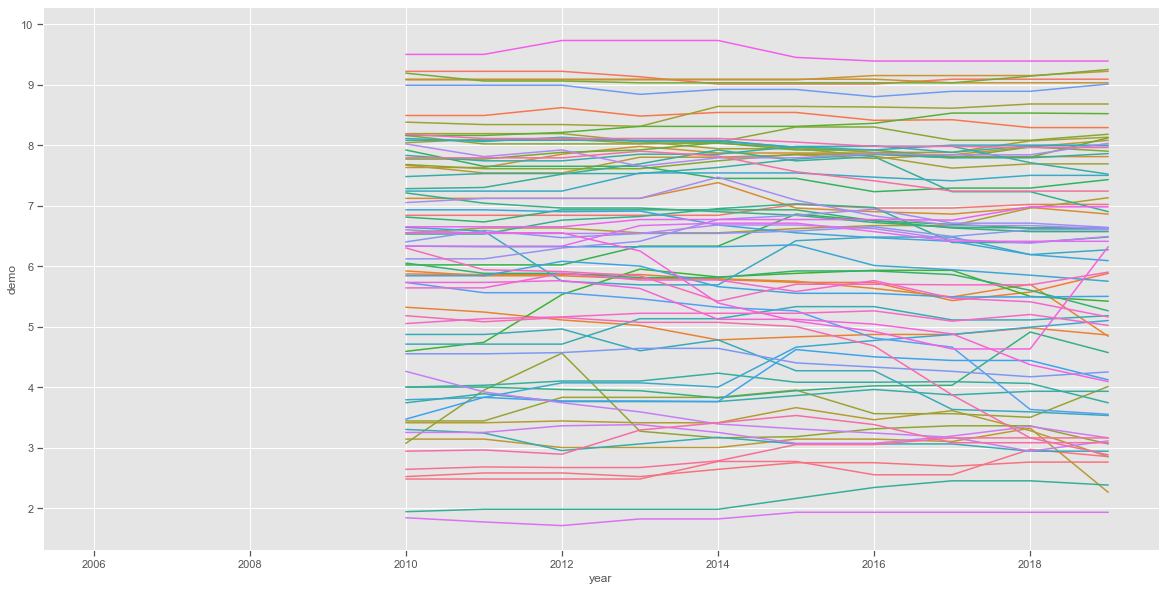

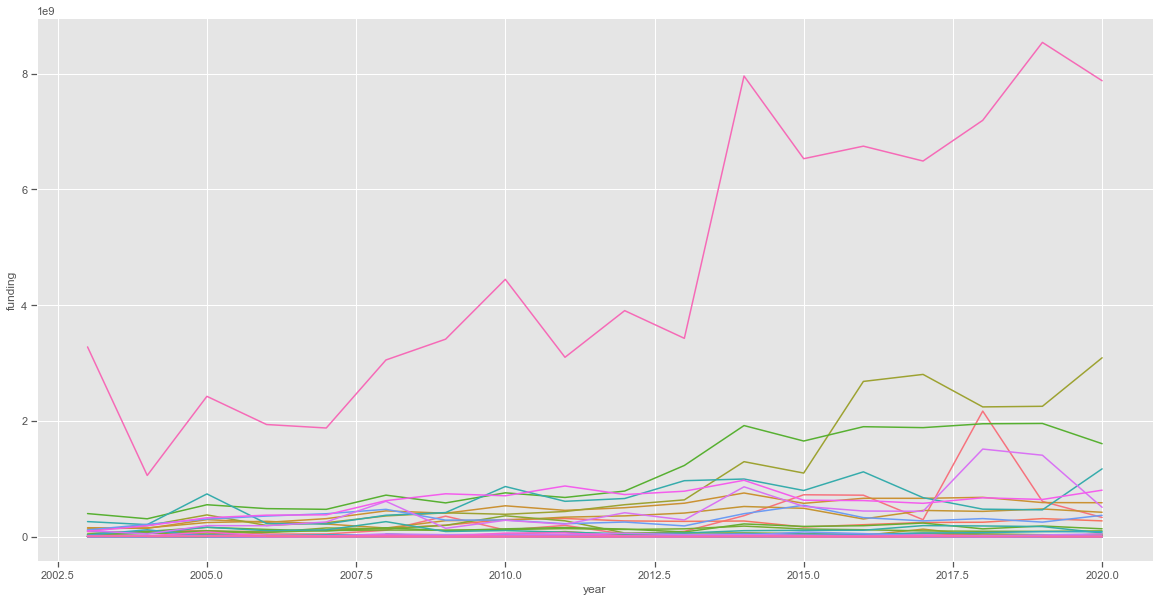

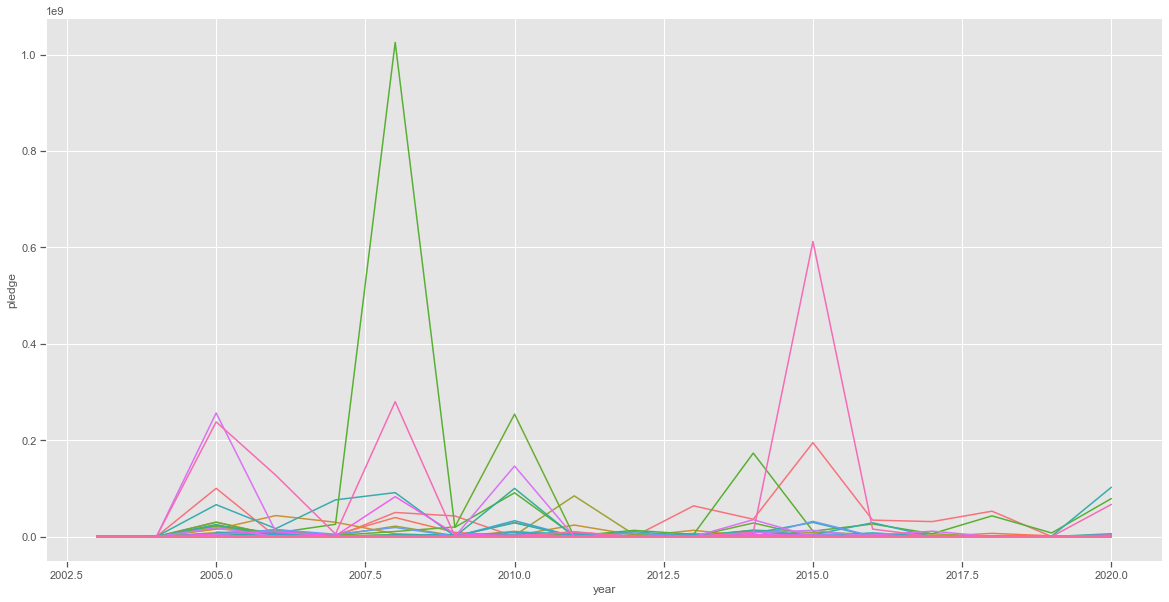

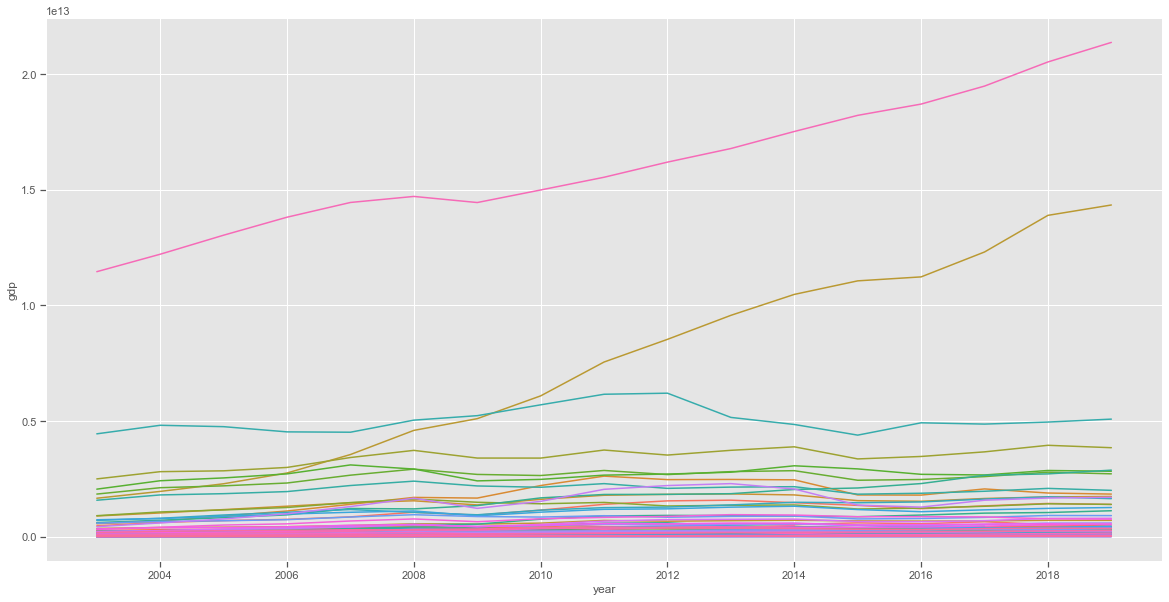

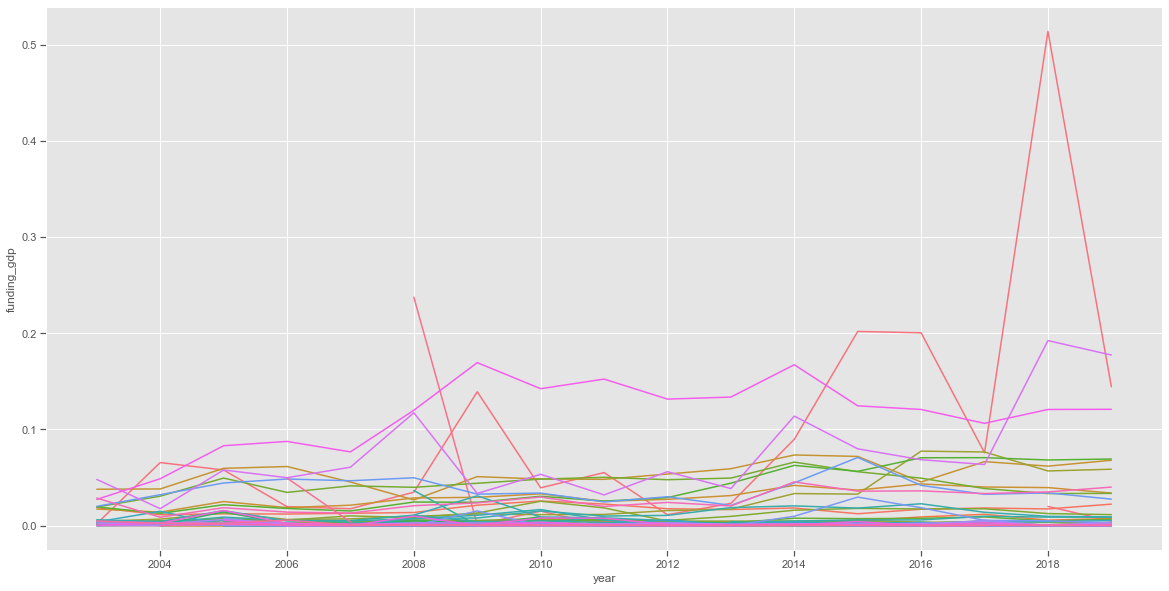

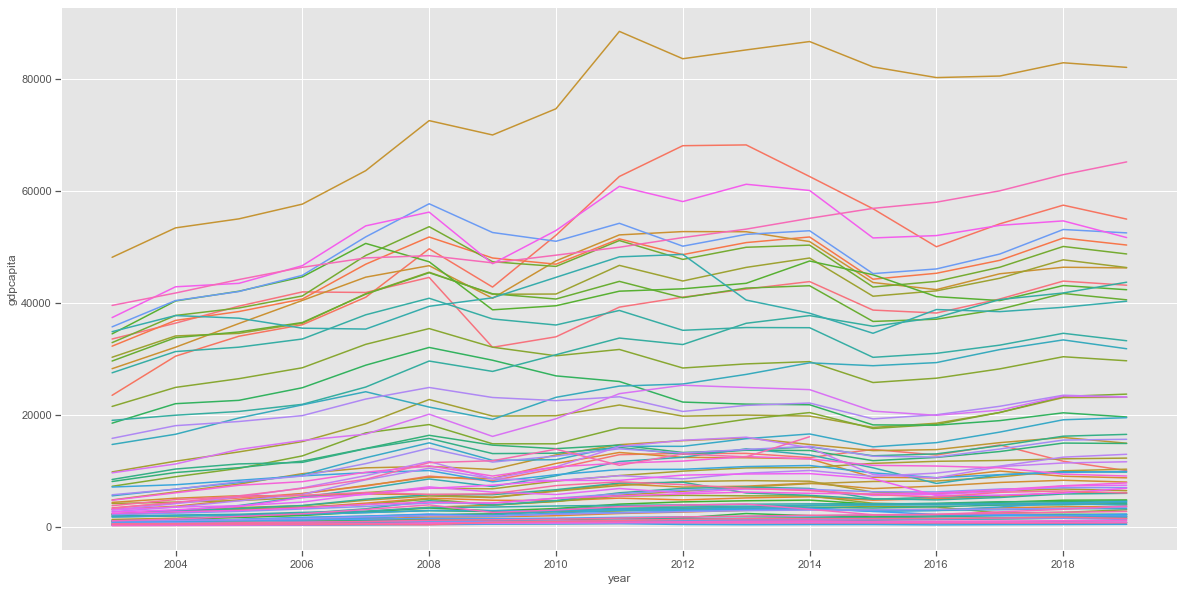

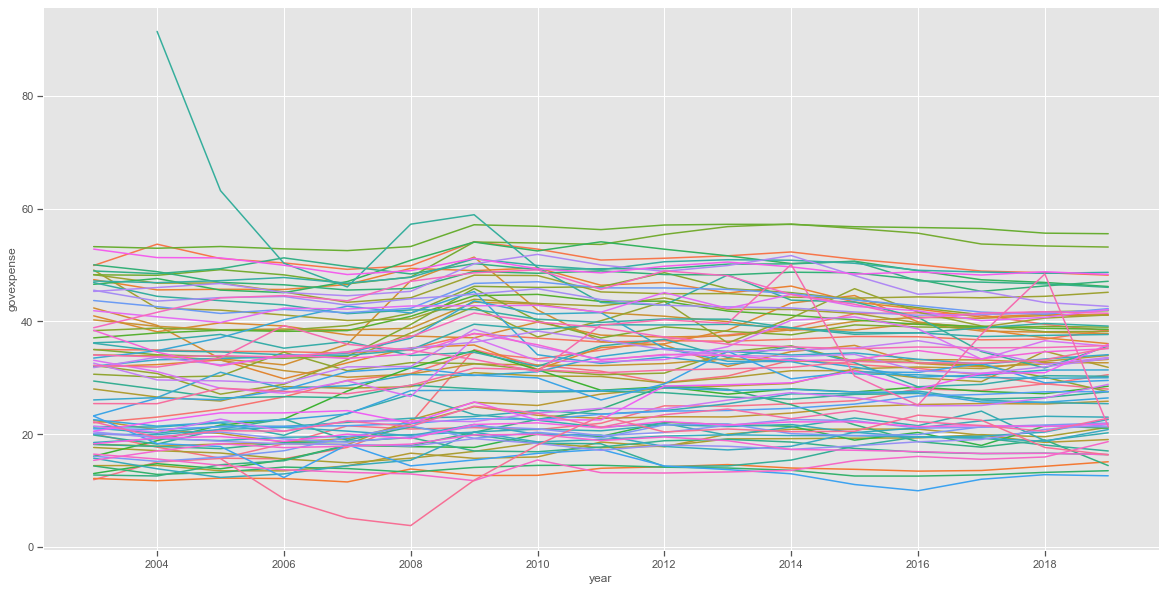

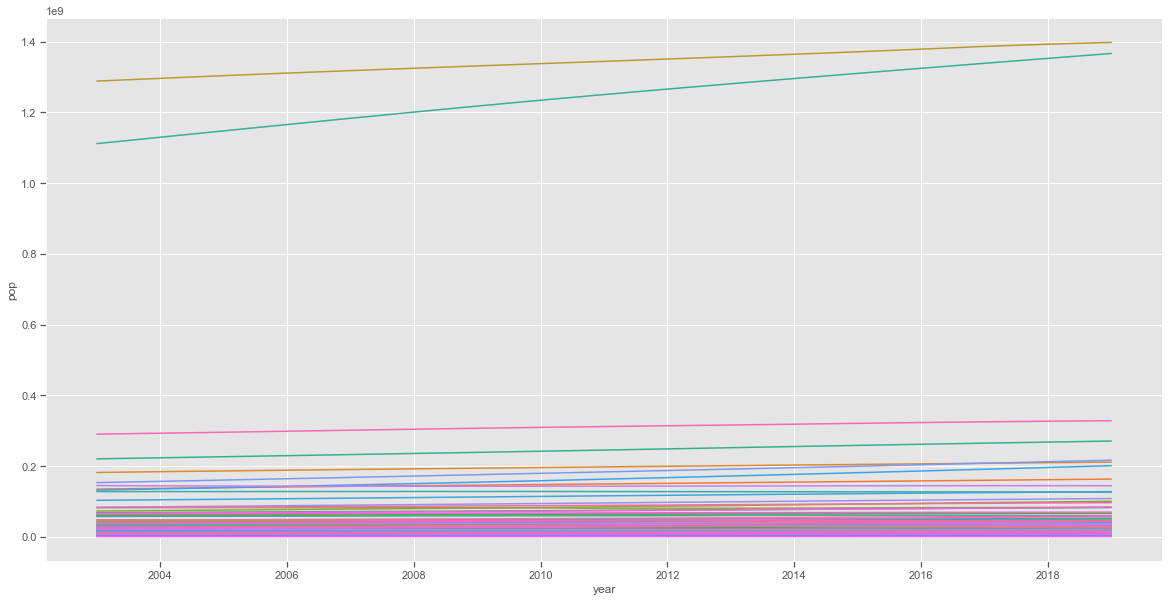

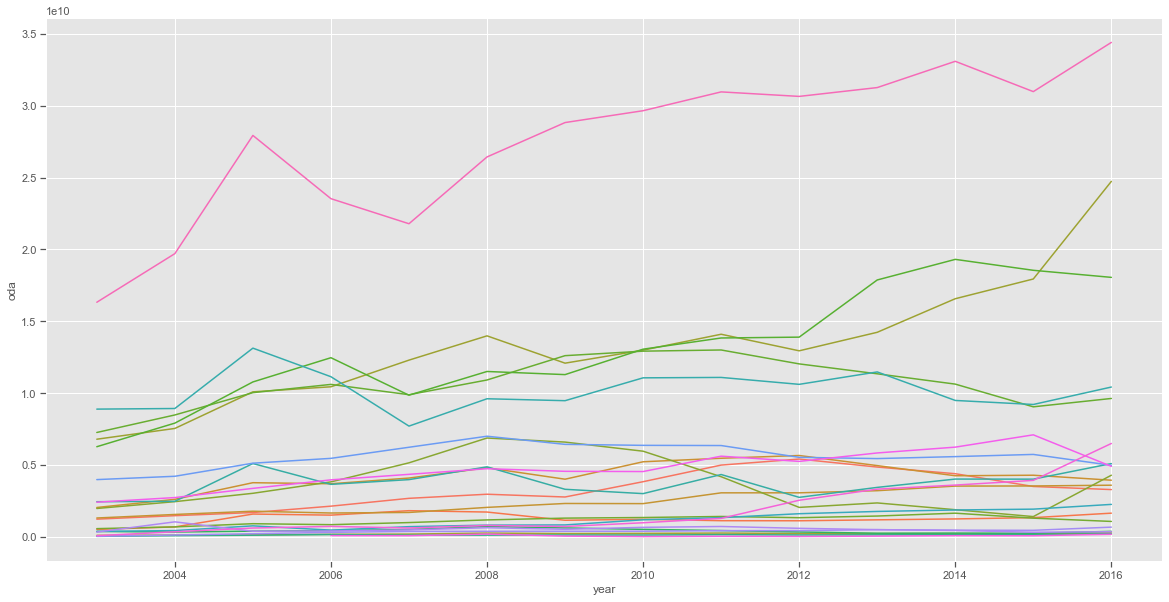

In [36]:
for i in year_vary:
    plt.figure()
    sns.lineplot(x="year", y= i, hue="country",  data=long, legend=False)


# plot distribution of yearly varied variable to see whether it is skewed

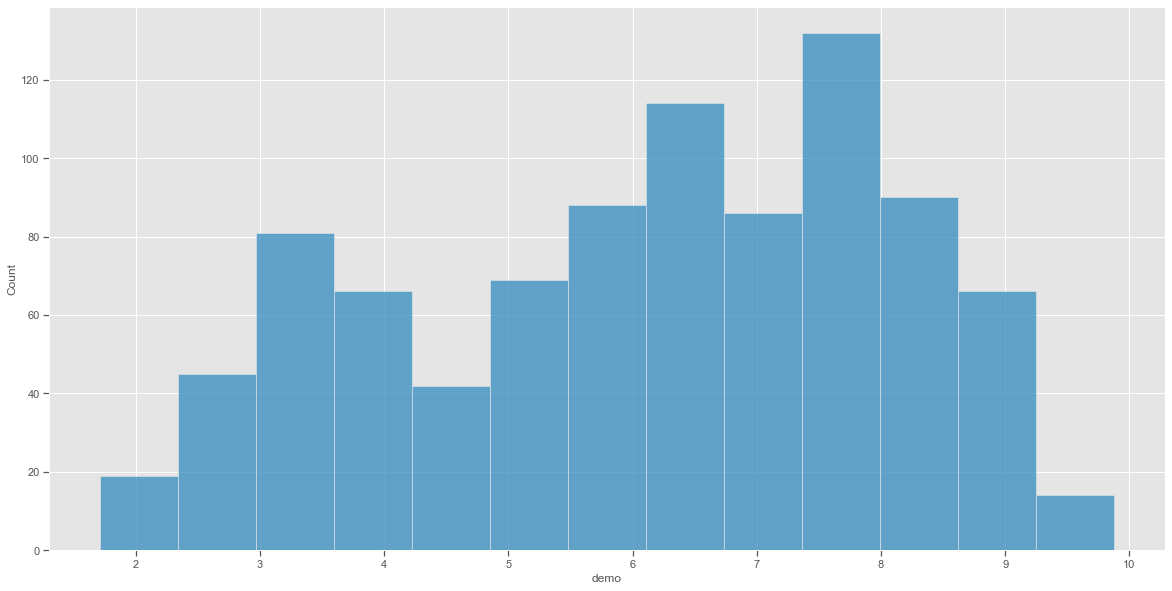

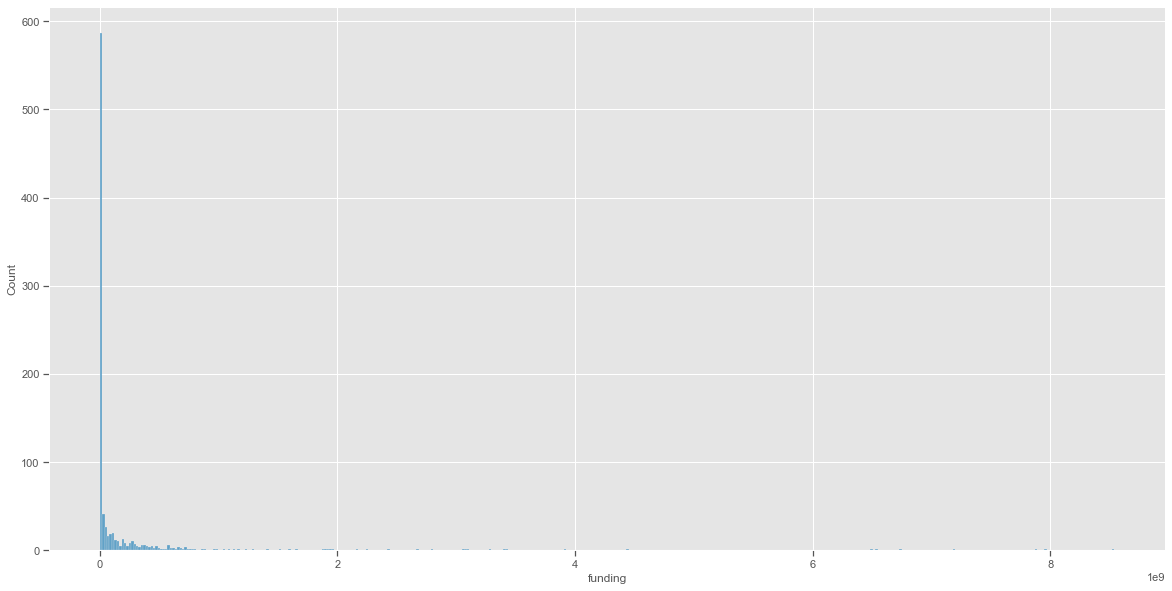

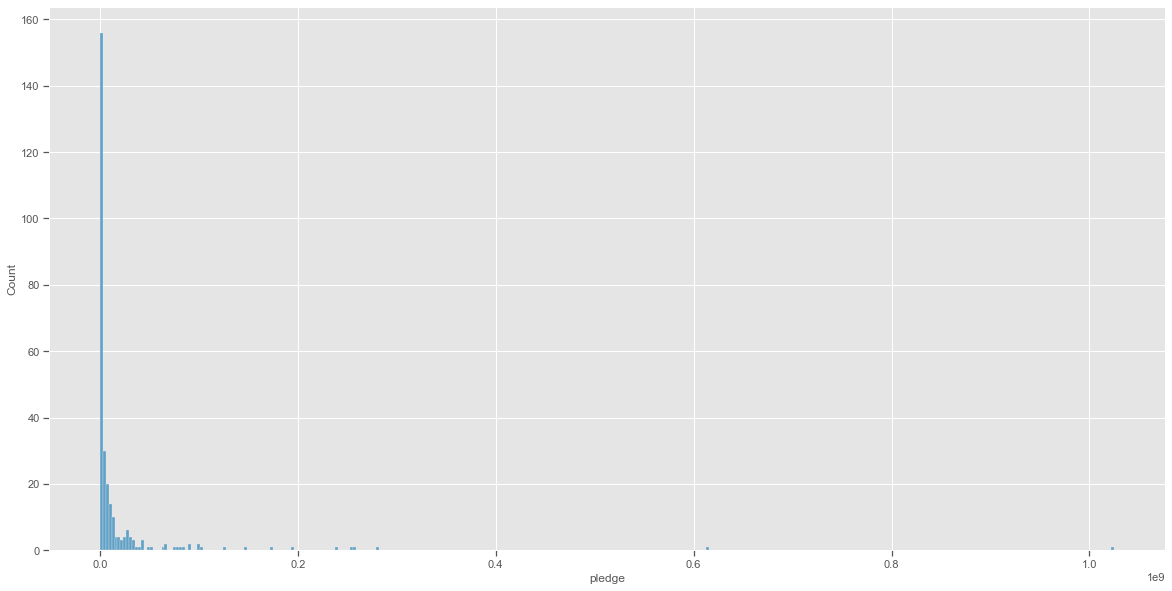

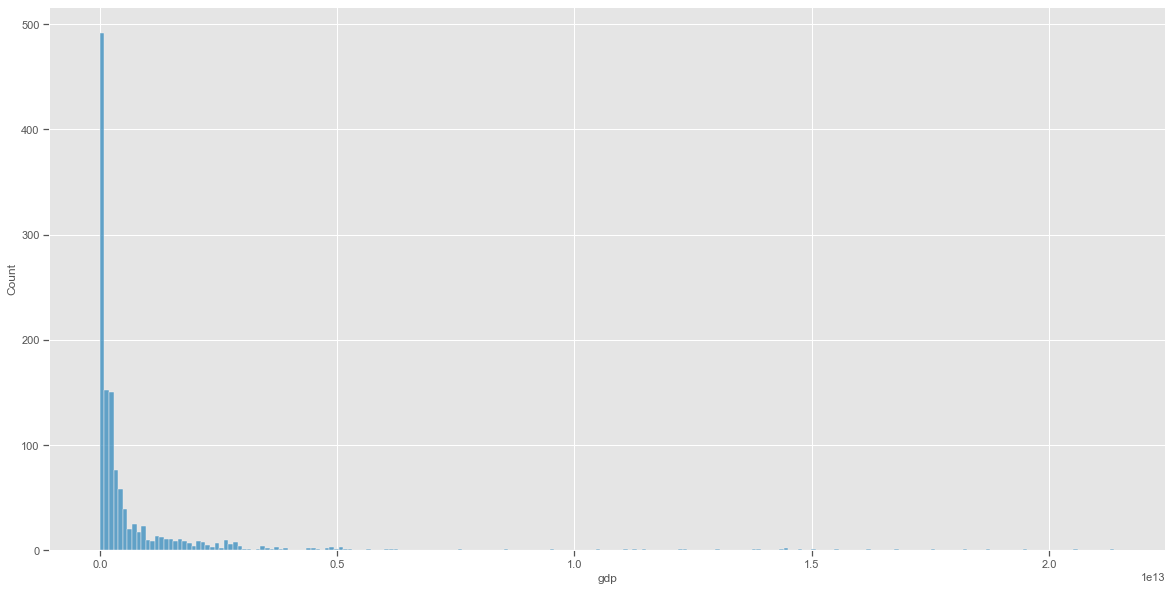

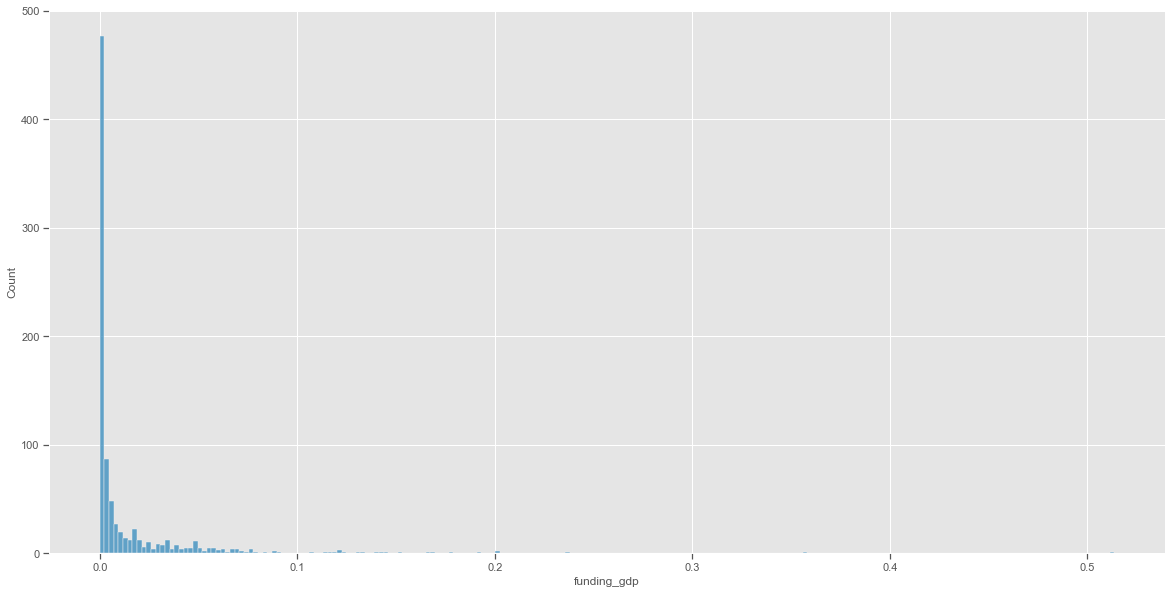

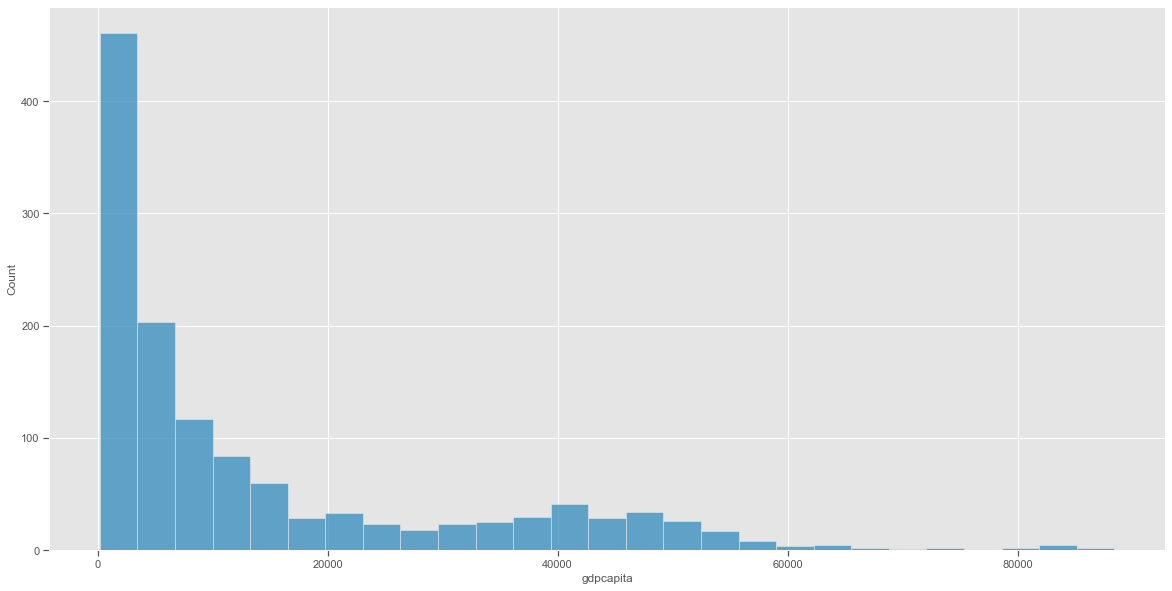

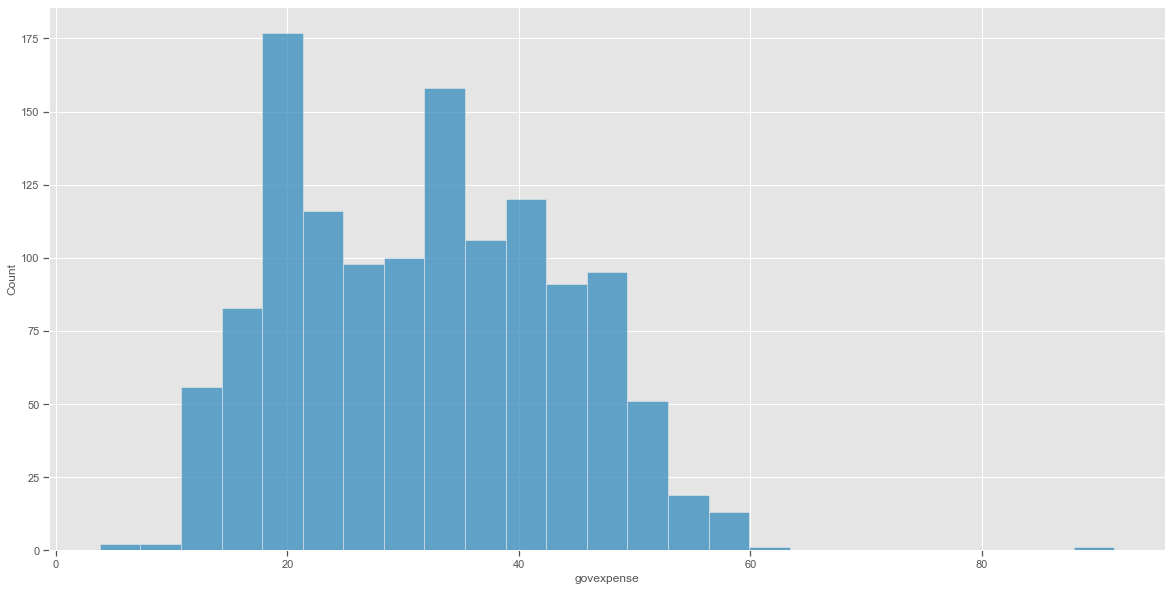

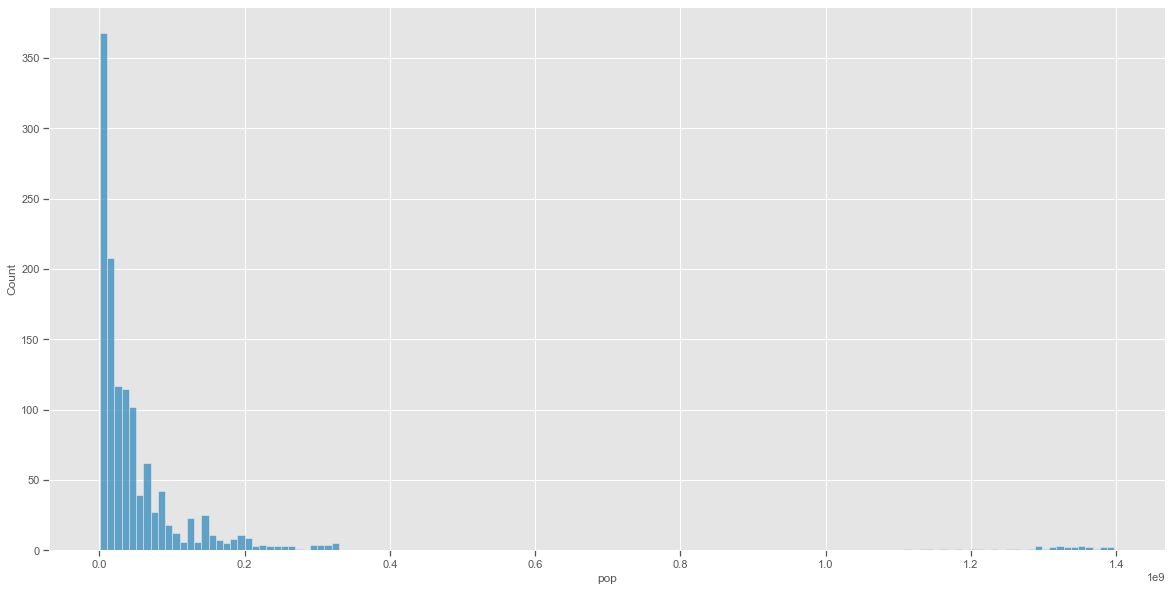

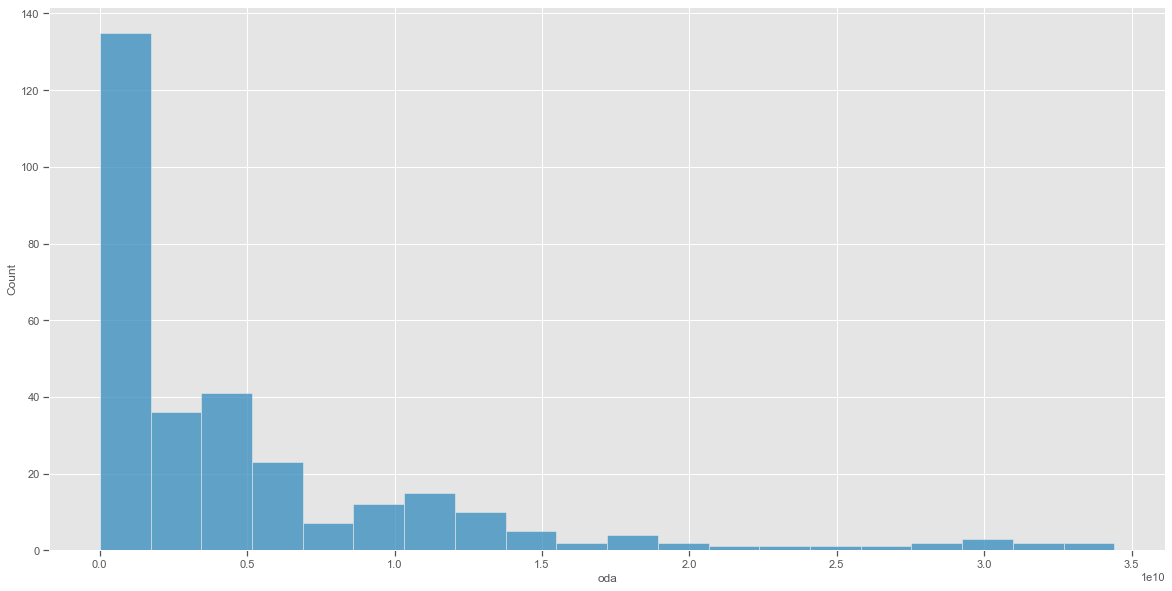

In [63]:
for i in year_vary:
    # long_dropna = long.dropna(subset=[i])
    plt.figure()
    sns.histplot(data=long, x=i)



# split data into 3 groups and examine sample mean and variance

In [55]:
for i in year_vary:
    sample3(i, long)

demo
[6.29 6.18 5.77]
[4.08 3.83 3.95]
funding
[2.04885011e+08 2.14204651e+08 2.19029376e+08]
[5.99622140e+17 6.60758117e+17 4.91748833e+17]
pledge
[26085402.73 19757181.22 17388463.1 ]
[1.40760948e+16 3.83049673e+15 2.59382216e+15]
gdp
[9.20308440e+11 7.35928822e+11 8.83068853e+11]
[6.52157747e+24 4.10861912e+24 4.70128573e+24]
funding_gdp
[0.01 0.01 0.02]
[0. 0. 0.]
gdpcapita
[14324.94 13829.41 15598.15]
[3.16673277e+08 2.91190201e+08 3.12639806e+08]
govexpense
[32.02 32.03 31.25]
[131.9  139.13 134.96]
pop
[70148463.61 83370252.4  82198455.34]
[3.13198584e+16 4.77726258e+16 4.73448480e+16]
oda
[4.55793889e+09 4.97758145e+09 5.52469256e+09]
[3.45009697e+19 4.74673319e+19 5.02770537e+19]


# augmented Dickey-Fuller test for stationary

In [68]:
for i in year_vary:
    adf_test = adfuller(long[i].dropna())
    if adf_test[1] > 0.01:
        print(f'{i} cannot reject H0:data is non-stationary')


oda cannot reject H0:data is non-stationary
